# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## Why RFM Analysis?

**RFM** stands for **Recency**, **Frequency**, and **Monetary**.  
It is a **data-driven technique** used to segment customers based on their past behaviours.

- RFM analysis can help **BankTrust** segment their customer base effectively.  
  By categorizing customers based on their transaction **Recency** (how recently they engaged with the bank),  
  **Frequency** (how often they conduct transactions), and **Monetary value** (the total value of their transactions),  
  BankTrust can identify different customer segments.  
  This segmentation allows for more **targeted marketing and service strategies**.

- RFM analysis can help BankTrust **identify customers who have become less active** (lower frequency)  
  or have **not engaged recently** (lower recency).  
  Recognizing these signs early enables BankTrust to implement **retention strategies** to prevent customer churn,  
  such as offering **personalized promotions** or contacting customers with **special offers**.

- RFM analysis helps BankTrust **optimize their marketing efforts**.  
  Instead of using a one-size-fits-all approach, BankTrust can **tailor their marketing campaigns**  
  to target specific customer segments with offers that are most likely to resonate.  
  This reduces **marketing costs** and increases the **return on investment (ROI)** for marketing campaigns.

## 🧱 Step 01 – Project Setup and Data Cleaning

This notebook handles the initial setup of the environment and prepares the dataset for analysis and modeling. The goal is to ensure the data is properly structured, typed, and cleaned before moving into deeper exploration and feature engineering.

### 🧾 Objectives

- Set up the Python environment and load required libraries
- Import the dataset into a structured format
- Inspect the dataset’s structure, column types, and sample entries
- Fix data type inconsistencies (e.g., dates, numerical values)
- Handle missing or invalid values
- Apply basic data cleaning (trimming, formatting, renaming if needed)

### 🧰 Key Tasks

- `pandas`, `numpy`, `matplotlib`, `seaborn` setup
- Load and preview dataset
- Convert date fields to datetime format (`CustomerDOB`, `TransactionDate`)
- Clean invalid or missing customer demographics
- Add a derived `age` feature from `CustomerDOB`
- Identify and correct obvious outliers (e.g., future birthdates, negative ages)

---

> 🔎 This foundational step ensures that all data going forward is consistent, usable, and ready for analysis.

### Import Libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Import

In [184]:
df = pd.read_csv('dataset/bank_data_C.csv')

df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [186]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [188]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


## Data cleaning

In [192]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [194]:
# Check for missing values in each column
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [196]:
# Convert DOB and Transaction date to datetime object
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format = 'mixed', dayfirst = True, errors = 'coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = 'mixed', dayfirst = True, errors = 'coerce')

In [197]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

In [200]:
# See the unique values for TransactionDate
df['TransactionDate'].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

**Create a new column for customer age**
<br>We can see that all transaction are done in 2016 so this can help us to know the age of each customer

In [202]:
# we create a function to create a new column age
def calculate_age(df):
    df['age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
    return df

In [204]:
df = calculate_age(df)

In [206]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Observe and correct customer with a negative age values**

In [208]:
df[df['age'] < 0]['CustomerDOB']

1         2057-04-04
3         2073-09-14
5         2072-10-08
15        2068-07-10
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-10-05
1041591   2071-10-05
1041599   2071-08-21
Name: CustomerDOB, Length: 104834, dtype: datetime64[ns]

In [210]:
# creation of the mask for year > 2016
mask = df['CustomerDOB'].dt.year > 2016

# Apply the mask only in rows concerned
df.loc[mask, 'CustomerDOB'] = df.loc[mask, 'CustomerDOB'] - pd.DateOffset(years=100)

In [212]:
# We can see hear that years are adjusted
df[df['age'] < 0]['CustomerDOB']

1         1957-04-04
3         1973-09-14
5         1972-10-08
15        1968-07-10
29        1967-01-21
             ...    
1041553   1970-09-20
1041557   1948-07-15
1041583   1933-10-05
1041591   1971-10-05
1041599   1971-08-21
Name: CustomerDOB, Length: 104834, dtype: datetime64[ns]

In [214]:
# We have to calculate the age again
df = calculate_age(df)

In [216]:
# We can see that there is no anymore negative age
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


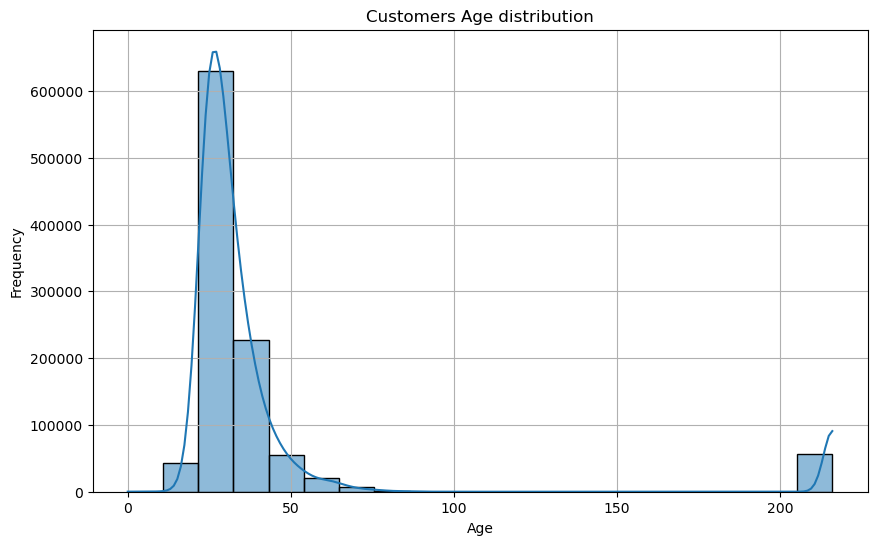

In [218]:
# Observe the age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins = 20, kde = True)
plt.title('Customers Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [220]:
df[df['age'] > 100]['CustomerDOB']

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [222]:
# We can see that we have outliers age (more than 200 years old) which is not valid.

# Define the threshold date
DOB_threshold = pd.to_datetime('1900-01-01')

# Define de DOB outlier mask
DOB_outlier_mask = df['CustomerDOB'] < DOB_threshold

#calculate the mean
mean_valid_DOB = df.loc[~DOB_outlier_mask, 'CustomerDOB'].mean()

# Replace DOB < 1900 by the mean
df.loc[DOB_outlier_mask, 'CustomerDOB'] = mean_valid_DOB

In [224]:
# verify if the modification is done
df[df['age'] > 100]['CustomerDOB']

16        1985-06-20 13:29:33.551387264
22        1985-06-20 13:29:33.551387264
28        1985-06-20 13:29:33.551387264
34        1985-06-20 13:29:33.551387264
150       1985-06-20 13:29:33.551387264
                       ...             
1041491   1985-06-20 13:29:33.551387264
1041500   1985-06-20 13:29:33.551387264
1041578   1985-06-20 13:29:33.551387264
1041580   1985-06-20 13:29:33.551387264
1041587   1985-06-20 13:29:33.551387264
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [226]:
# We have to recalculate the age
df = calculate_age(df)

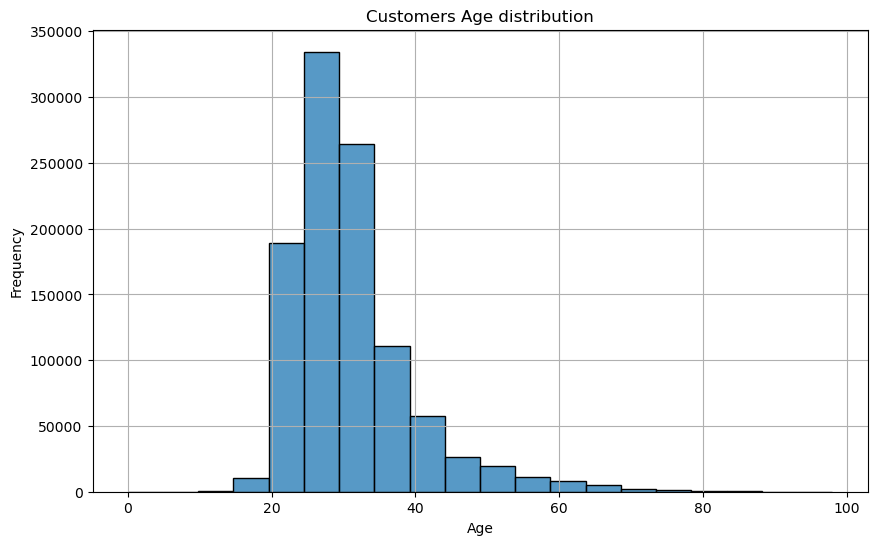

In [228]:
# Observe the age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins = 20, kde = False)
plt.title('Customers Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [230]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


**Observe the gender**

In [232]:
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [234]:
# We have to change T to M
df['CustGender'] = df['CustGender'].replace('T', 'M')

In [236]:
df['CustGender'].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

**Observe Location**

In [238]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

**Observe Account Balace**

In [240]:
# We can have customer with account balance zero it's not a problem
df['CustAccountBalance'].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Observe Transaction amounts**

In [242]:
df['TransactionAmount (INR)'].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [244]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [246]:
# We have to drop Transaction amounts with zero
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index.tolist(), axis = 0)

In [248]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

In [250]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28
...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38


In [258]:
df.to_csv('dataset/bank_data_C_cleaned.csv')